In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import yfinance as yf

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# Чтение данных

In [2]:
prices = pd.read_csv('prices.csv')
indexes = pd.read_csv('indexes.csv')
prices.drop(columns=['Unnamed: 0'], inplace=True)
indexes.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
returns = {}
for i in prices.drop(columns=['Date']).columns:
    returns[i] = np.log(np.array(prices[i])[1:]/np.array(prices[i])[:-1])
returns = pd.DataFrame(returns)

In [4]:
to_delete = []
for i in returns.columns:
    cur_dict = returns[i].value_counts()
    if 0 in cur_dict and cur_dict[0] > returns.shape[0] * 0.05:
        to_delete.append(i)
returns.drop(columns=to_delete, inplace=True)

In [5]:
indexes_returns = np.log(np.array(indexes['Close'])[1:]/np.array(indexes['Close'])[:-1])

In [6]:
returns.head(5)

,013A.BE,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02M.BE,02M.MU,02M.SG,...,ZSV.BE,ZSV.DU,ZT1A.SG,ZVA.BE,ZVA.SG,ZVX.BE,ZVX.SG,ZYA.DU,ZYA.MU,ZYA.SG
0,0.044388,0.009771,0.055880,-0.004040,-0.008807,0.000000,-0.028710,0.013377,0.037058,0.006658,...,0.007149,0.006873,0.002987,0.016625,-0.007392,0.015851,0.032383,-0.012423,-0.015363,0.002488
1,0.019418,0.000000,0.007220,0.022023,-0.007477,0.015152,-0.019608,0.000000,0.000455,0.000000,...,-0.020762,-0.020762,0.023122,0.009844,0.052200,0.021733,-0.055525,0.012423,0.006899,0.012346
2,-0.008276,0.048527,-0.021819,0.029270,0.067115,0.000000,-0.014963,0.008969,0.009050,0.009050,...,-0.007018,-0.007018,0.022600,0.000816,-0.014185,-0.034065,-0.009602,0.006154,0.006231,-0.006154
3,0.056543,0.015666,0.000000,0.000000,0.017392,0.000000,-0.005038,-0.018018,0.017858,-0.009050,...,-0.007067,-0.014185,0.005571,0.077656,0.015748,-0.006342,-0.034351,0.006116,0.006192,0.012270
4,0.020726,0.002587,0.043172,0.009569,0.033902,0.007491,-0.020408,0.009050,-0.036040,-0.018349,...,0.000000,0.000000,0.021979,-0.008337,-0.011788,0.001177,0.058890,0.012121,0.012270,0.030032


# Используемые обозначения:
- $(R_1,R_2,\ldots,R_N)^T$ - случайный вектор доходностей активов
- $E=(E(R_1),E(R_2),\ldots,E(R_N))^T$ - вектор средних доходностей
- $\Sigma$ - ковариационная матрица случайного вектора $(R_1,R_2,\ldots,R_N)^T$
- $(x_1,x_2,\ldots,x_N)^T$ - вектор долей активов в портфеле
- $\mathbf{1}=(1,1,\ldots,1)^T$ - единичный вектор
- $R(x)=\sum_{i=1}^N x_i R_i$ - доходность инвестиционного портфеля


# 1. Efficient frontier.

Из 6190 акций на немецком рынке отберем 50 акций с максимальным отношением $E(X) / \sigma(X)$.

In [7]:
sharpe = (returns.mean() / returns.std()).sort_values(ascending=False)[:50]
names = list(dict(sharpe).keys())
returns = returns[names]

In [8]:
returns.head()

,2EV.SG,HOO.BE,ADY.BE,EFC1.BE,WD1.SG,HOO.SG,ADY.SG,EFC1.DU,EFC1.SG,OEWA.DE,...,EUZ.SG,DO2.BE,CIE1.HM,OEWA.HM,FO8.BE,FAN.BE,3E2.BE,TEG.DE,CIE1.BE,HT2.MU
0,-0.011893,0.016094,0.019789,-0.001617,-0.012209,-0.009565,-0.021573,-0.000462,-0.001112,0.000000,...,-0.004581,0.003616,0.011628,-0.007968,0.018098,0.014691,-0.004376,0.024369,0.010459,-0.006557
1,0.026433,0.000000,-0.018182,-0.000925,0.015666,0.008811,0.013986,-0.001849,0.000000,0.038259,...,0.017070,-0.007547,0.011494,-0.000500,0.016173,0.000000,-0.011765,0.000617,0.017192,0.006557
2,0.017242,0.008734,0.004577,0.006687,0.000000,0.017392,-0.013986,0.006226,0.020189,0.005758,...,0.008427,-0.007605,0.016998,0.032967,-0.027102,0.016529,-0.011905,0.012872,0.011299,0.000000
3,-0.008584,0.017242,0.000000,0.016639,0.005168,0.000000,-0.004706,0.017320,-0.010043,-0.002875,...,0.026227,0.000000,-0.011299,0.014416,0.010929,0.008163,0.005970,0.012708,-0.005634,0.000000
4,0.000000,-0.008584,-0.041964,-0.003396,0.010257,0.000000,-0.019048,-0.003848,0.003207,0.000959,...,0.016217,0.030077,0.033523,0.007605,0.021506,0.008097,0.005935,-0.002408,0.027857,0.019418


Визуализируем 50 лучших акций в системе координат $(\sigma, E)$.

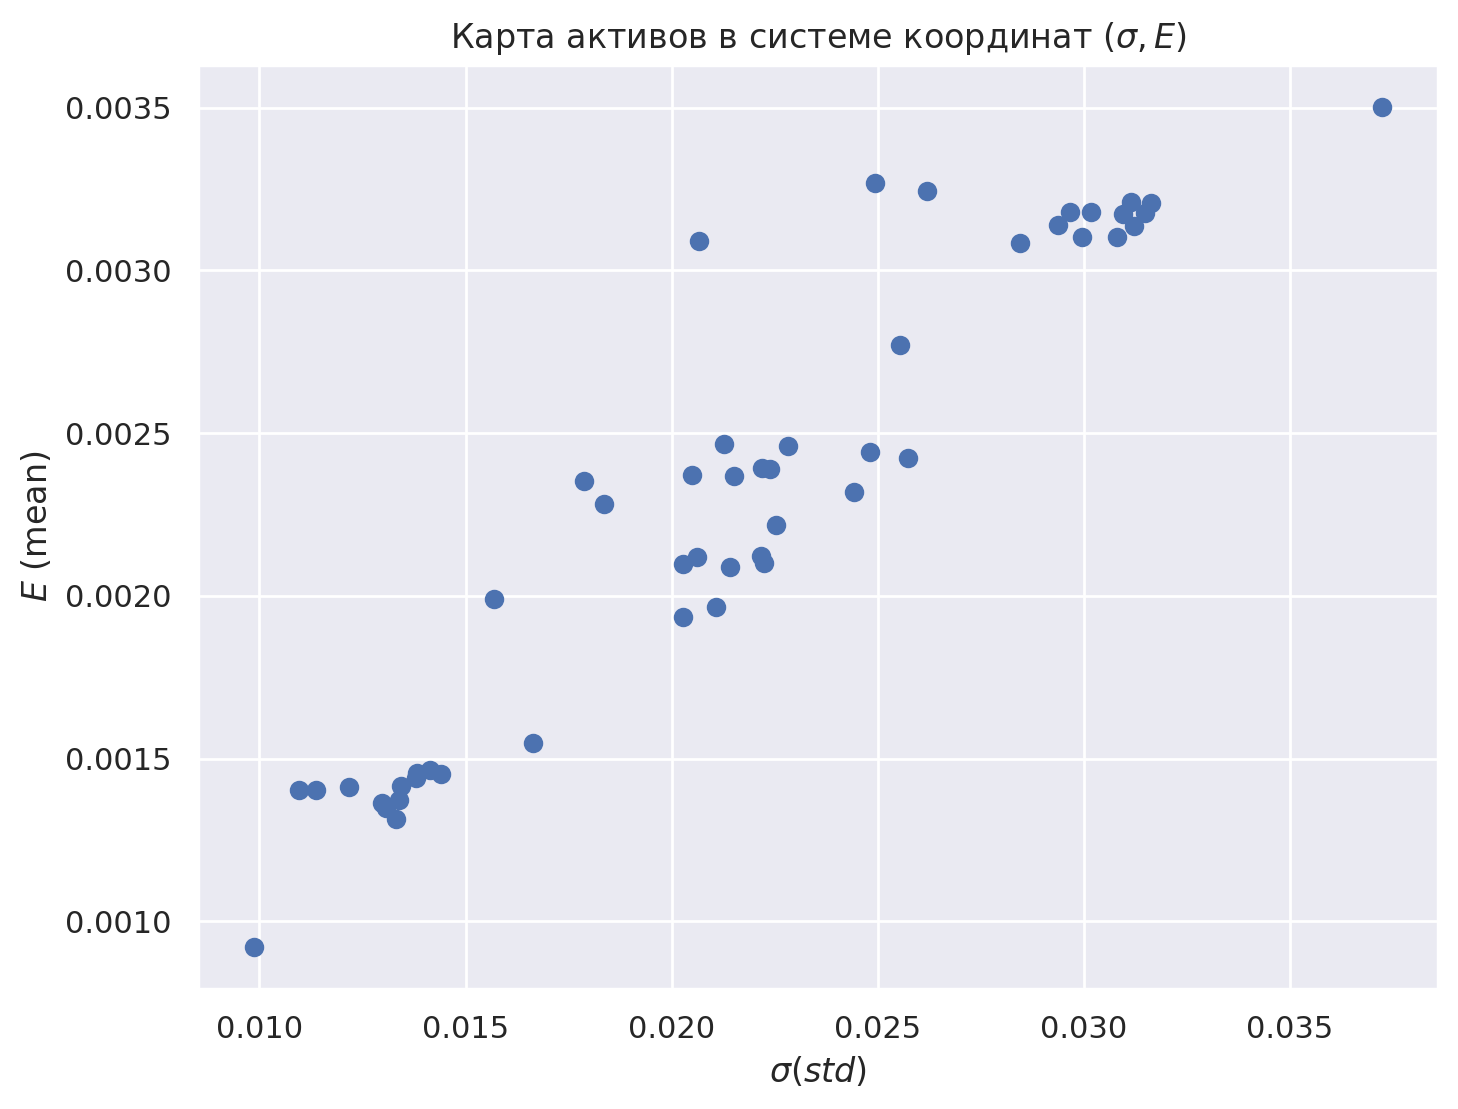

In [9]:
plt.scatter(returns.std(), returns.mean())

plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

Сформулируем задачи, которые будут решаться:

**1. Поиск портфеля без запрета коротких продаж:**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1 \\
E^T x = E_0 
\end{cases}
$$
Решением такой задачи оптимизации в предположении $det(\Sigma)\neq 0$ является:
$$
x=-\lambda \Sigma^{-1} \mathbf{1} - \mu \Sigma^{-1} E
$$
где $\lambda$ и $\mu$ находятся из системы уравнений:
$$
\begin{pmatrix}
\mathbf{1}^T \Sigma^{-1} \mathbf{1} & \mathbf{1}^T \Sigma^{-1}E \\
\mathbf{1}^T \Sigma^{-1}E & E^T \Sigma^{-1}E
\end{pmatrix}
\begin{pmatrix}\lambda \\ \mu \end{pmatrix} =
\begin{pmatrix}-1 \\ -E_0 \end{pmatrix}
$$

**2. Поиск портфеля с минимальным риском без запрета коротких продаж**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1
\end{cases}
$$
Решением такой задачи оптимизации в предположении $det(\Sigma)\neq 0$ является:
$$
x = \dfrac{1}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}} \Sigma^{-1} \mathbf{1}
$$

**3. Поиск портфеля с запретом коротких продаж**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1 \\
E^T x = E_0 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$
Для нахождения решения данной задачи оптимизации используется численный метод **Sequential quadratic programming** (SLSQP в пакете SciPy).

**4. Поиск портфеля с минимальным риском с запретом коротких продаж**
$$
\begin{cases}
\dfrac{1}{2} x^T \Sigma x \to \min \\
\mathbf{1}^T x = 1 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$
Для нахождения решения данной задачи оптимизации используется численный метод **Sequential quadratic programming** (SLSQP в пакете SciPy).

In [10]:
import numpy as np
from scipy.optimize import minimize
from numpy.random import random

def sle_solver(a11: float, a12: float, a21: float, a22: float, b1: float, b2: float) -> tuple[float, float]:
    det = a11 * a22 - a12 * a21
    x1 = b1 * a22 - b2 * a21
    x2 = a11 * b2 - a21 * b1
    return x1 / det, x2 / det

def with_short_sales(S: np.ndarray, E: np.ndarray, E0: int) -> np.ndarray:
    ones = np.ones(len(S))
    S_inv = np.linalg.inv(S)
    a11 = np.dot(np.dot(ones, S_inv), ones)
    a12 = np.dot(np.dot(ones, S_inv), E)
    a22 = np.dot(np.dot(E, S_inv), E)
    lam, mu =  sle_solver(a11, a12, a12, a22, -1, -E0)
    x = -lam * np.dot(S_inv, ones) - mu * np.dot(S_inv, E)
    return x

def minimal_risk_with_short_sales(S: np.ndarray, E: np.ndarray) -> np.ndarray:
    ones = np.ones(len(S))
    S_inv = np.linalg.inv(S)
    return np.dot(S_inv, ones) / np.dot(np.dot(ones, S_inv), ones)

def without_short_sales(S: np.ndarray, E: np.ndarray, E0: int) -> np.ndarray:
    def objective(x):
        return np.dot(np.dot(x,S),x)
    def constraint1(x):
        return np.sum(x) - 1
    def constraint2(x):
        return np.dot(x, E) - E0
    x0 = np.array([1 for i in range(len(E))])
    bounds = ((0.0, 1.0) for i in range(len(E)))
    cons=[{'type': 'eq','fun': constraint1}, {'type': 'ineq','fun': constraint2}]
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

def minimal_risk_without_short_sales(S: np.ndarray, E: np.ndarray) -> np.ndarray:
    def objective(x):
        return np.dot(np.dot(x,S),x)
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    bounds = ((0.0, 1.0) for i in range(len(E)))
    cons=[{'type': 'eq','fun': constraint1}]
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

In [11]:
def calcuate_sigma(S: np.ndarray, x: np.ndarray) -> float:
    return np.sqrt(np.dot(np.dot(x,S),x))

def draw_efficient_frontier(S: np.ndarray, E: np.ndarray, indexes_returns: float):
    x_min_with_short_sales = minimal_risk_with_short_sales(S, E)
    E0_min_with_short_sales = np.dot(x_min_with_short_sales, E)

    plt.scatter(calcuate_sigma(S,x_min_with_short_sales), E0_min_with_short_sales, 
    label='Портфель с мин. риском без запрета коротких продаж')

    E_with_short_sales = np.linspace(E0_min_with_short_sales, 0.007, 100)
    sigma_with_short_sales = [calcuate_sigma(S, with_short_sales(S, E, i)) for i in E_with_short_sales]
    plt.plot(sigma_with_short_sales, E_with_short_sales, label='Эфф.фронт без запрета коротких продаж')

    x_min_without_short_sales = minimal_risk_without_short_sales(S,E)
    E0_min_without_short_sales = np.dot(x_min_without_short_sales, E)

    plt.scatter(calcuate_sigma(S,x_min_without_short_sales), E0_min_without_short_sales, 
    label='Портфель с мин. риском с запретом коротких продаж')

    E_without_short_sales = np.linspace(E0_min_without_short_sales, 0.0035, 100)
    sigma_without_short_sales = [calcuate_sigma(S, without_short_sales(S, E, i)) for i in E_without_short_sales]
    plt.plot(sigma_without_short_sales, E_without_short_sales, label='Эфф.фронт с запретом коротких продаж')

    x_equal = [1/len(E) for i in range(len(E))]
    sigma_equal = calcuate_sigma(S, x_equal)
    E_equal = np.dot(x_equal, E)
    plt.scatter(sigma_equal, E_equal, label='Портфель с равными долями')

    plt.scatter(np.std(indexes_returns), np.mean(indexes_returns), label='Индекс рынка')
    
    plt.xlabel('$\sigma (std)$')
    plt.ylabel('$E$ (mean)')
    plt.title('Карта портфелей в системе координат $(\sigma, E)$')
    plt.legend()

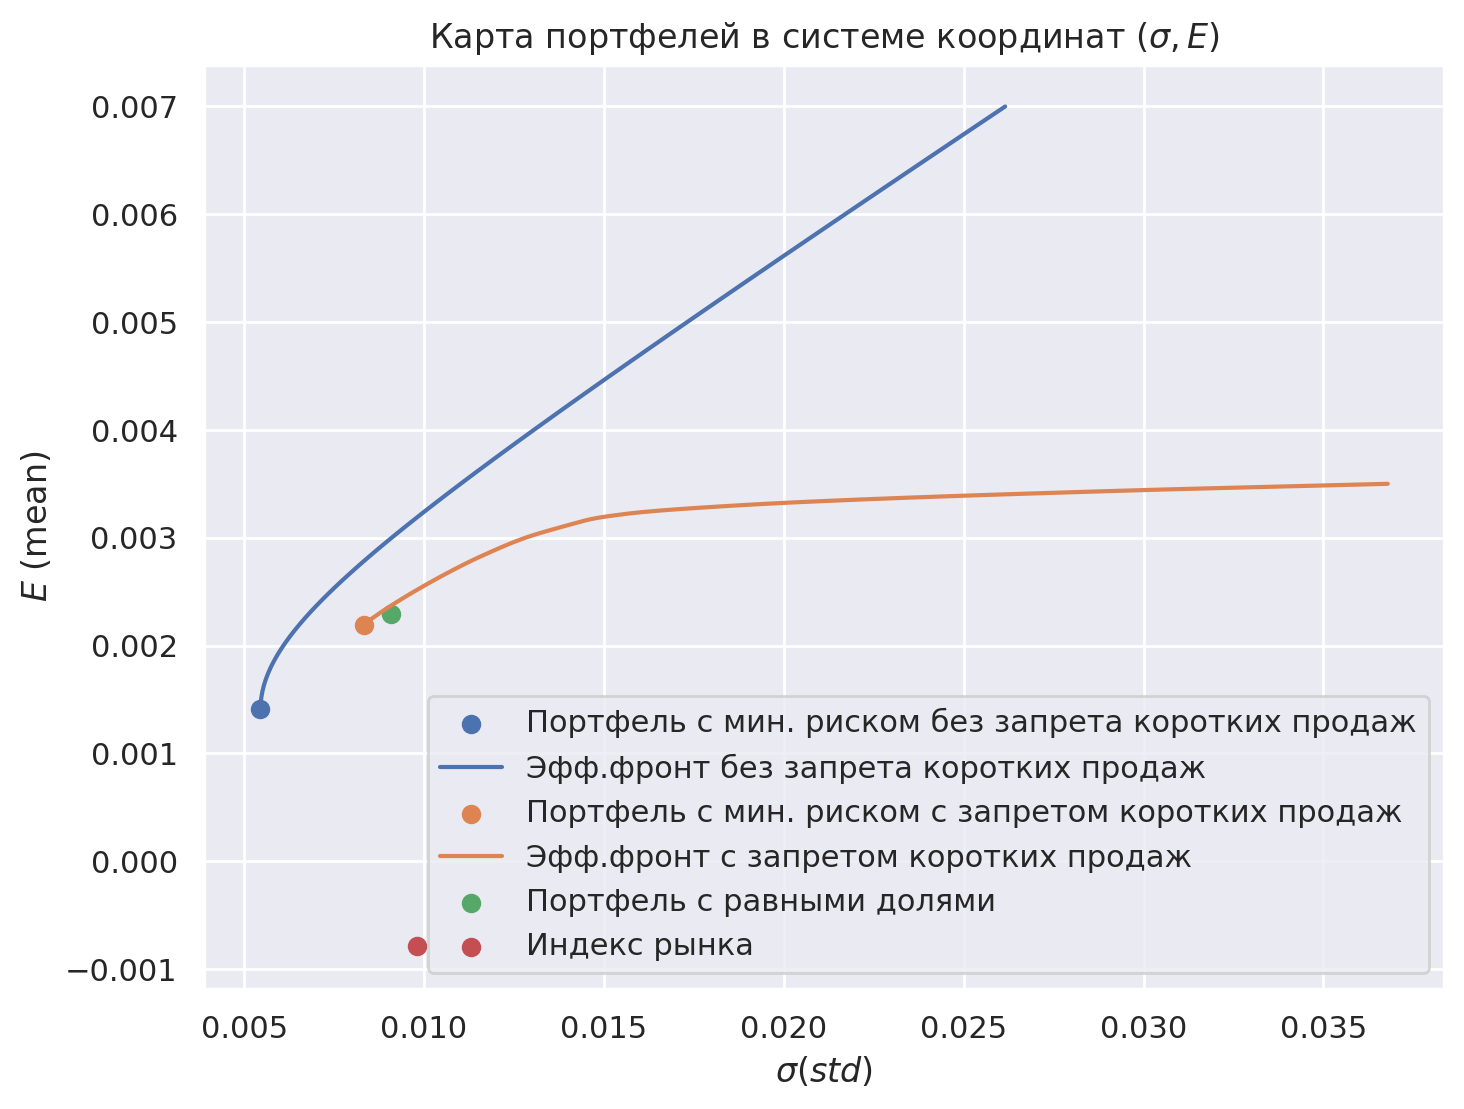

In [12]:
draw_efficient_frontier(np.array(returns.cov()), np.array(returns.mean()), indexes_returns)
plt.show()

Портфель с равными долями лежит рядом с эффективным фронтом при запрете коротких продаж. Индекс рынка лежит далеко от эффективных фронтов.

# 2. Portfolio selection problem

Среди отобранных 50 акций выберем актив с наибольшей доходностью, а затем 9 активов которые меньше всего коррелируют с ним по корреляции Кендалла.

In [13]:
best = returns.mean().sort_values(ascending=False)[:1].keys()[0]

In [14]:
top10 = list(dict(np.abs(returns.corr(method='kendall')[best]).sort_values(ascending=True)[:9]).keys())
top10.append(best)
top10_returns = returns[top10]

Визуализируем эти активы.

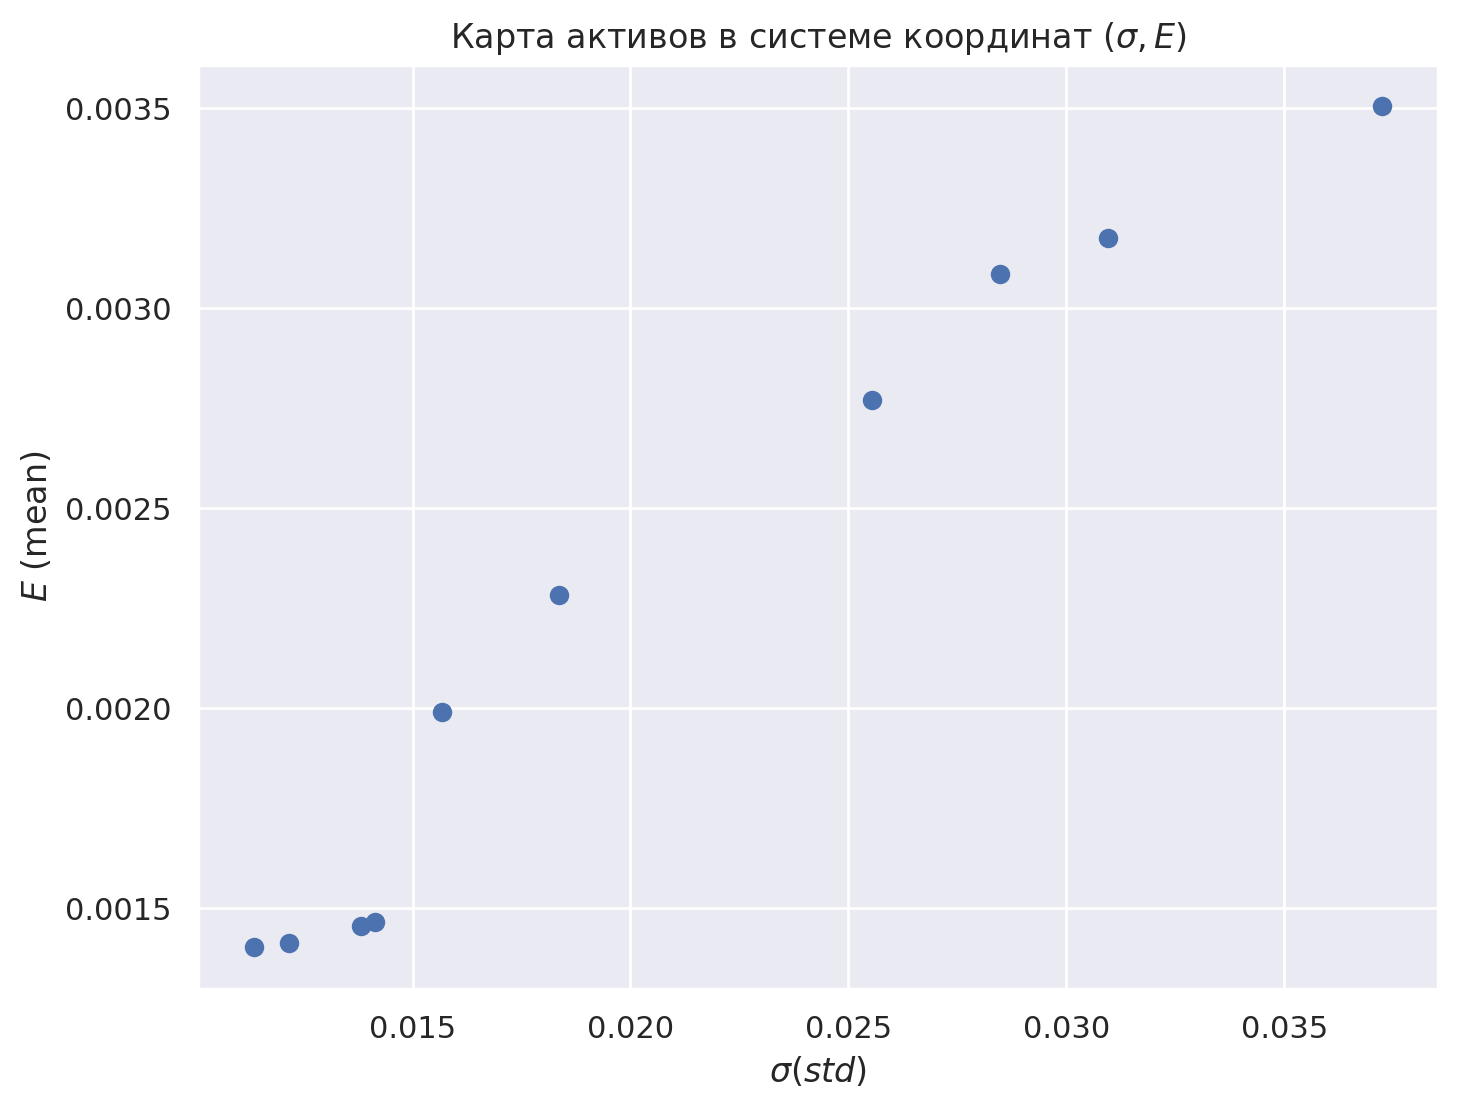

In [15]:
plt.scatter(top10_returns.std(), top10_returns.mean())

plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

In [16]:
def draw_efficient_frontier(S: np.ndarray, E: np.ndarray, n: int, E1: float=0.007, E2: float=0.0035):
    x_min_with_short_sales = minimal_risk_with_short_sales(S, E)
    E0_min_with_short_sales = np.dot(x_min_with_short_sales, E)

    E_with_short_sales = np.linspace(E0_min_with_short_sales, E1, 100)
    sigma_with_short_sales = [calcuate_sigma(S, with_short_sales(S, E, i)) for i in E_with_short_sales]
    plt.plot(sigma_with_short_sales, E_with_short_sales, label=f'Эфф.фронт без запрета коротких продаж ({n} акций)')

    x_min_without_short_sales = minimal_risk_without_short_sales(S,E)
    E0_min_without_short_sales = np.dot(x_min_without_short_sales, E)

    E_without_short_sales = np.linspace(E0_min_without_short_sales, E2, 100)
    sigma_without_short_sales = [calcuate_sigma(S, without_short_sales(S, E, i)) for i in E_without_short_sales]
    plt.plot(sigma_without_short_sales, E_without_short_sales, label=f'Эфф.фронт с запретом коротких продаж ({n} акций)')

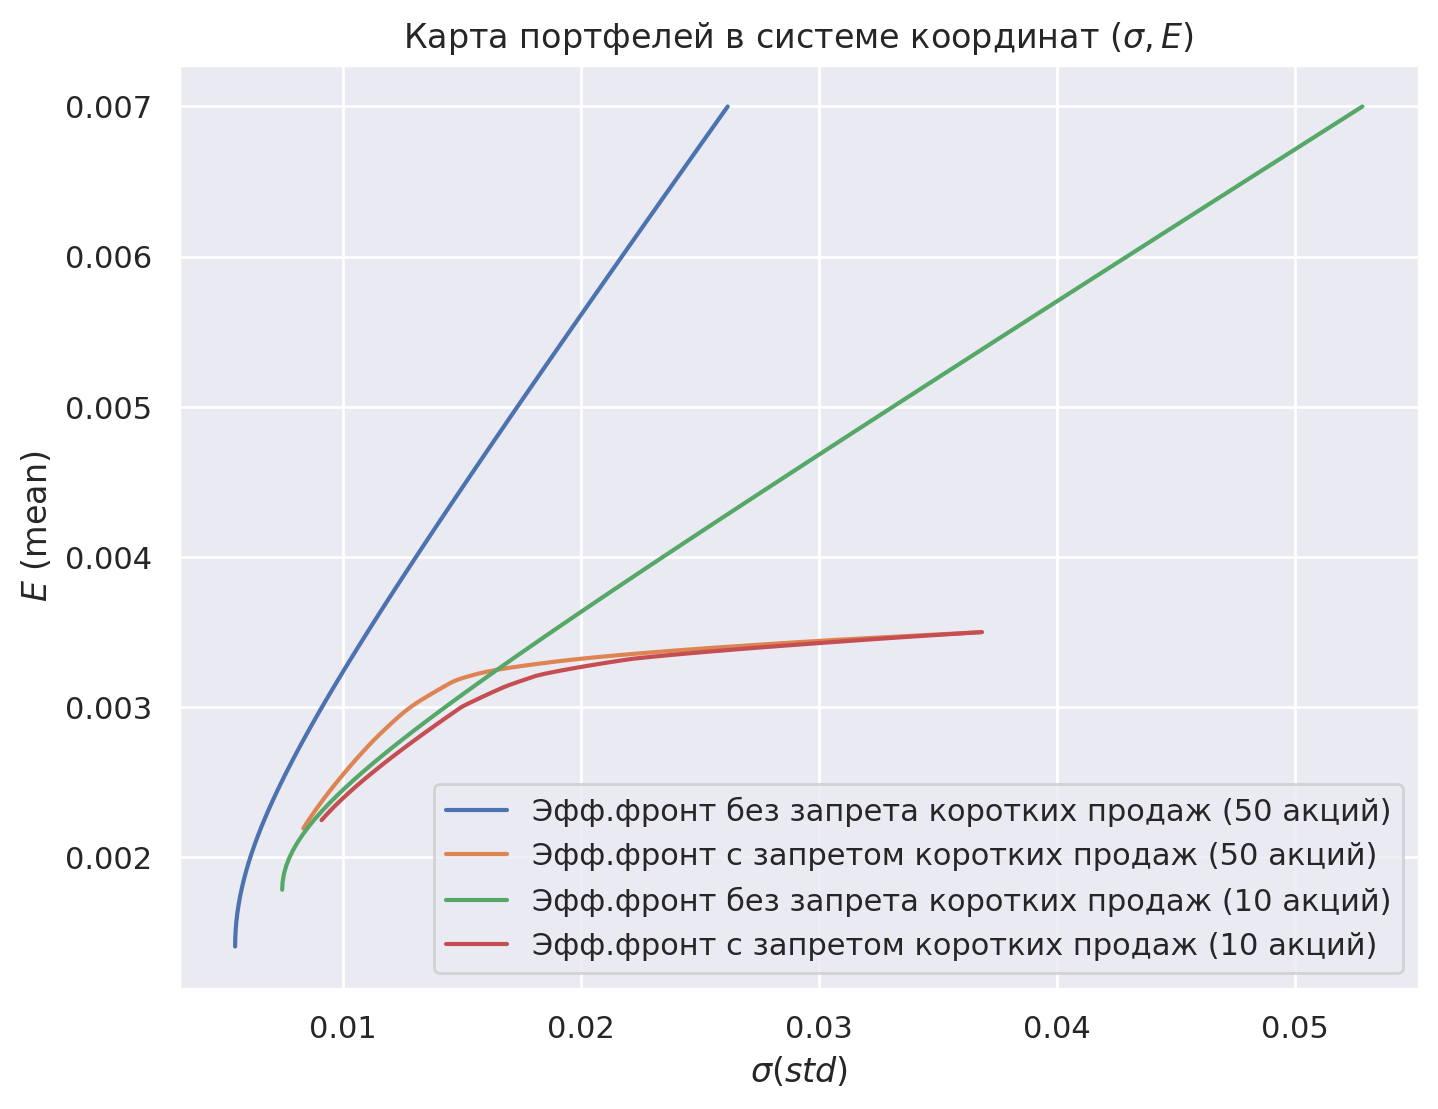

In [17]:
draw_efficient_frontier(np.array(returns.cov()), np.array(returns.mean()), 50)
draw_efficient_frontier(np.array(top10_returns.cov()), np.array(top10_returns.mean()), 10)
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта портфелей в системе координат $(\sigma, E)$')
plt.legend()
plt.show()

Имеют место следующие наблюдения:
- при фиксированной доходности портфель с большим числом акций имеет меньший риск
- эффективные фронты с запретом коротких продаж сходятся при увеличении средней доходности портфеля

# 3. Risk aversion

In [18]:
returns = returns[returns.mean().sort_values().index]
label = np.round(list(returns.mean()),7)

Запишем оптимизационные задачи.

**Короткие продажи разрешены:**
$$
\begin{cases}
-E(x) + RA \cdot \sigma(x) \to min \\
\sum_{i=1}^N x_i = 1
\end{cases}
$$
где $E(x)=E^T x$, $\sigma(x)=\sqrt{x^T \Sigma x}$, $RA$ - отношение к риску.

**Короткие продажи запрещены:**
$$
\begin{cases}
-E(x) + RA \cdot \sigma(x) \to min \\
\sum_{i=1}^N x_i = 1 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$

Для нахождения решения данных оптимизационных задач используется численный метод **Sequential quadratic programming** (SLSQP в пакете SciPy, язык программирования Python).

Положим $RA=3$.

In [19]:
def risk_aversion_with_short_sales(S: np.ndarray, E: np.ndarray, RA: float = 3) -> np.ndarray:
    def objective(x):
        return -np.dot(E,x) + RA * np.sqrt(np.dot(np.dot(x,S),x))
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    cons=[{'type': 'eq','fun': constraint1}]
    solver = minimize(objective, x0, method='SLSQP', constraints=cons)
    if solver.success:
        return solver.x
    return None

def risk_aversion_without_short_sales(S: np.ndarray, E: np.ndarray, RA: float = 3) -> np.ndarray:
    def objective(x):
        return -np.dot(E,x) + RA * np.sqrt(np.dot(np.dot(x,S),x))
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    cons=[{'type': 'eq','fun': constraint1}]
    bounds = ((0.0, 1.0) for i in range(len(E)))
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

In [20]:
x_risk_aversion_with_short_sales = risk_aversion_with_short_sales(np.array(returns.cov()), np.array(returns.mean()))
x_risk_aversion_without_short_sales = risk_aversion_without_short_sales(np.array(returns.cov()), np.array(returns.mean()))

x_risk_aversion_with_short_sales=pd.Series(data=x_risk_aversion_with_short_sales, index=label)
x_risk_aversion_without_short_sales=pd.Series(data=x_risk_aversion_without_short_sales, index=label)

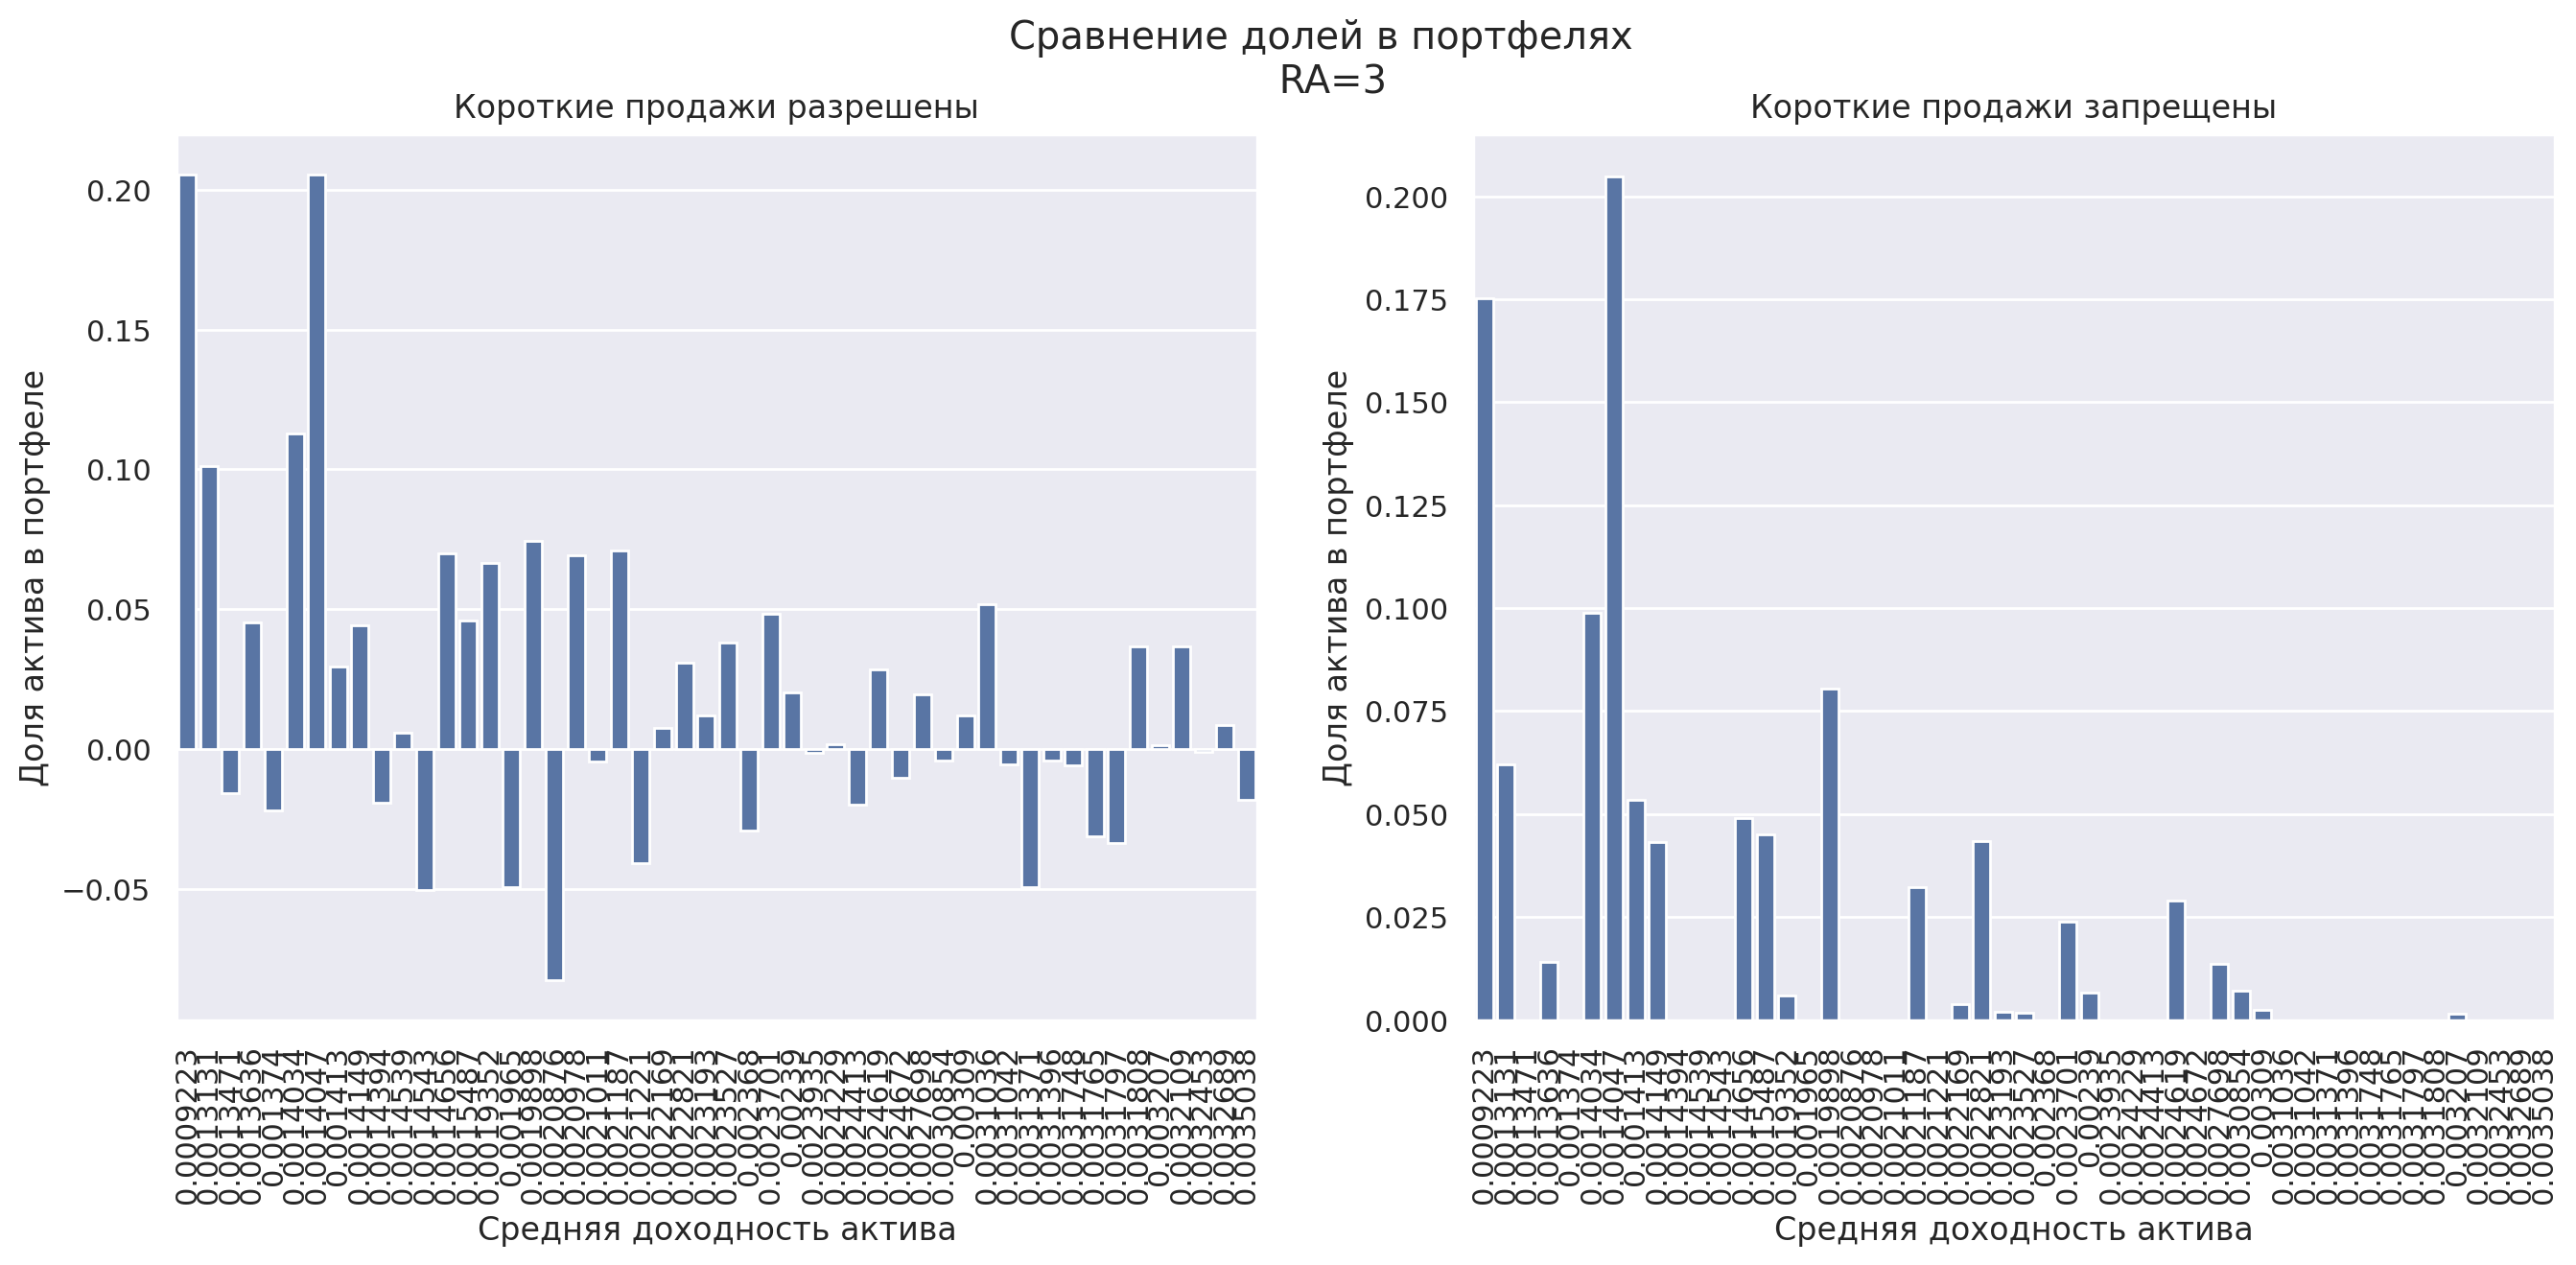

In [22]:
plt.rcParams['figure.figsize'] = 16, 6

plt.suptitle('Сравнение долей в портфелях \n RA=3')

plt.subplot(1,2,1)
plt.title('Короткие продажи разрешены')
sns.barplot(x_risk_aversion_with_short_sales)
plt.xticks(rotation=90)
plt.xlabel('Средняя доходность актива')
plt.ylabel('Доля актива в портфеле')

plt.subplot(1,2,2)
plt.title('Короткие продажи запрещены')
sns.barplot(x_risk_aversion_without_short_sales)
plt.xticks(rotation=90)
plt.xlabel('Средняя доходность актива')
plt.ylabel('Доля актива в портфеле')

plt.show()

plt.rcParams['figure.figsize'] = 8, 6

Из данных графиков видно, что модель Risk aversion в основном предпочитает акции с небольшими доходностями (а значит и с небольшим риском).

Сравним основные характеристики этих портфелей.

In [23]:
R_with_short_sales = np.dot(np.array(returns), x_risk_aversion_with_short_sales)
R_without_short_sales = np.dot(np.array(returns), x_risk_aversion_without_short_sales)

print(f'Короткие продажи разрешены, RA = 3:\n E(x) = {np.round(np.mean(R_with_short_sales),4)} \n std(x) = {np.round(np.std(R_with_short_sales),4)}')
print(f' VaR(-R) на уровне 0.9 = {np.round(np.quantile(-R_with_short_sales, 0.9),4)}')
print(f' VaR(-R) на уровне 0.95 = {np.round(np.quantile(-R_with_short_sales, 0.95),4)}')

print()

print(f'Короткие продажи запрещены, RA = 3:\n E(x) = {np.round(np.mean(R_without_short_sales),4)} \n std(x) = {np.round(np.std(R_without_short_sales),4)}')
print(f' VaR(-R) на уровне 0.9 = {np.round(np.quantile(-R_without_short_sales, 0.9),4)}')
print(f' VaR(-R) на уровне 0.95 = {np.round(np.quantile(-R_without_short_sales, 0.95),4)}')

Короткие продажи разрешены, RA = 3:
 E(x) = 0.0015 
 std(x) = 0.0055
 VaR(-R) на уровне 0.9 = 0.0054
 VaR(-R) на уровне 0.95 = 0.0068

Короткие продажи запрещены, RA = 3:
 E(x) = 0.0015 
 std(x) = 0.0057
 VaR(-R) на уровне 0.9 = 0.0053
 VaR(-R) на уровне 0.95 = 0.0073


Портфели получаются похожими по всем характеристикам.

# 4. Markowitz-Tobin model

Решаются следующие задачи оптимизации:

**Короткие продажи разрешены:**
$$
\begin{cases}
\dfrac{E(x)-E_F}{\sigma(x)} \to \max \\
\sum_{i=1}^N x_i = 1
\end{cases}
$$
где $E_F$ - доходность безрискового актива.

**Короткие продажи запрещены:**
$$
\begin{cases}
\dfrac{E(x)-E_F}{\sigma(x)} \to \max \\
\sum_{i=1}^N x_i = 1 \\
x_i \geq 0, \; i=1,\ldots,N
\end{cases}
$$

Положим $E_F=0.0017$.

In [24]:
def markowitz_tobin_with_short_sales(S: np.ndarray, E: np.ndarray, E_F: float = 0.0017) -> np.ndarray:
    def objective(x):
        return -(np.dot(E,x)-E_F) / np.sqrt(np.dot(np.dot(x,S),x))
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    cons=[{'type': 'eq','fun': constraint1}]
    solver = minimize(objective, x0, method='SLSQP', constraints=cons)
    if solver.success:
        return solver.x
    return None

def markowitz_tobin_without_short_sales(S: np.ndarray, E: np.ndarray, E_F: float = 0.0017) -> np.ndarray:
    def objective(x):
        return -(np.dot(E,x)-E_F) / np.sqrt(np.dot(np.dot(x,S),x))
    def constraint1(x):
        return np.sum(x) - 1
    x0 = np.array([1 for i in range(len(E))])
    cons=[{'type': 'eq','fun': constraint1}]
    bounds = ((0.0, 1.0) for i in range(len(E)))
    solver = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if solver.success:
        return solver.x
    return None

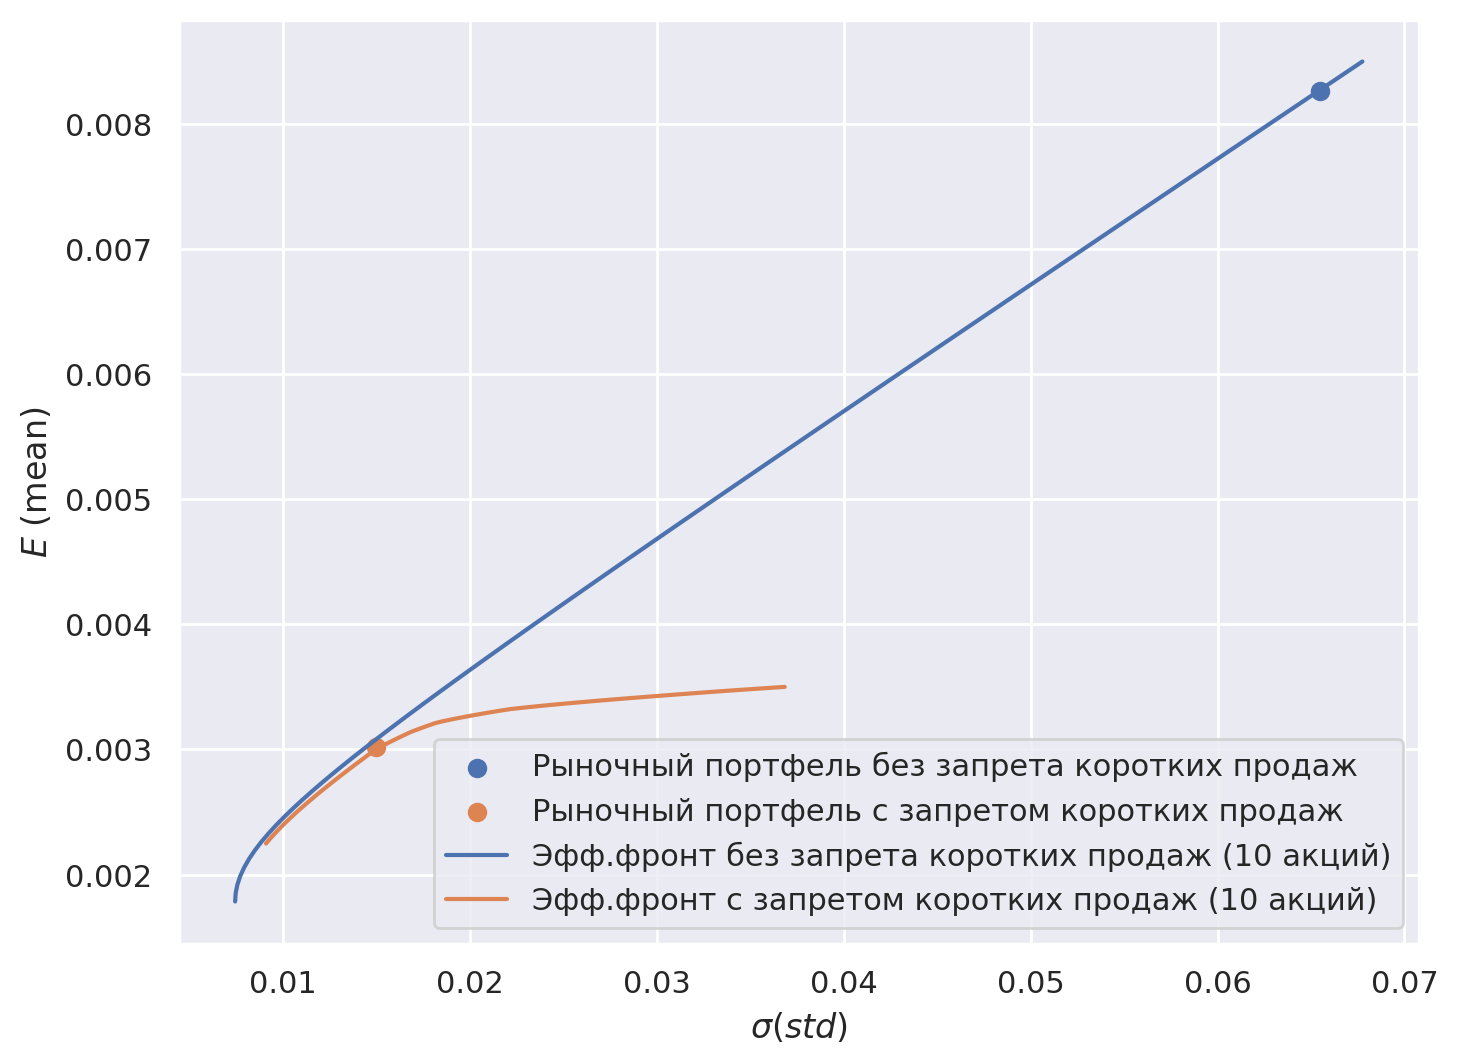

In [25]:
E = np.array(top10_returns.mean())
S = np.array(top10_returns.cov())

x_with_short_sales = markowitz_tobin_with_short_sales(S, E)
x_without_short_sales = markowitz_tobin_without_short_sales(S, E)

plt.scatter([calcuate_sigma(S, x_with_short_sales)], np.dot(E, x_with_short_sales), label='Рыночный портфель без запрета коротких продаж')
plt.scatter([calcuate_sigma(S, x_without_short_sales)], np.dot(E, x_without_short_sales), label='Рыночный портфель с запретом коротких продаж')

draw_efficient_frontier(S, E, 10, 0.0085)
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.legend()
plt.show()

In [26]:
labels = np.round(np.array(top10_returns.mean()),5)
x_with_short_sales=pd.Series(data=x_with_short_sales, index=labels)
x_without_short_sales=pd.Series(data=x_without_short_sales, index=labels)

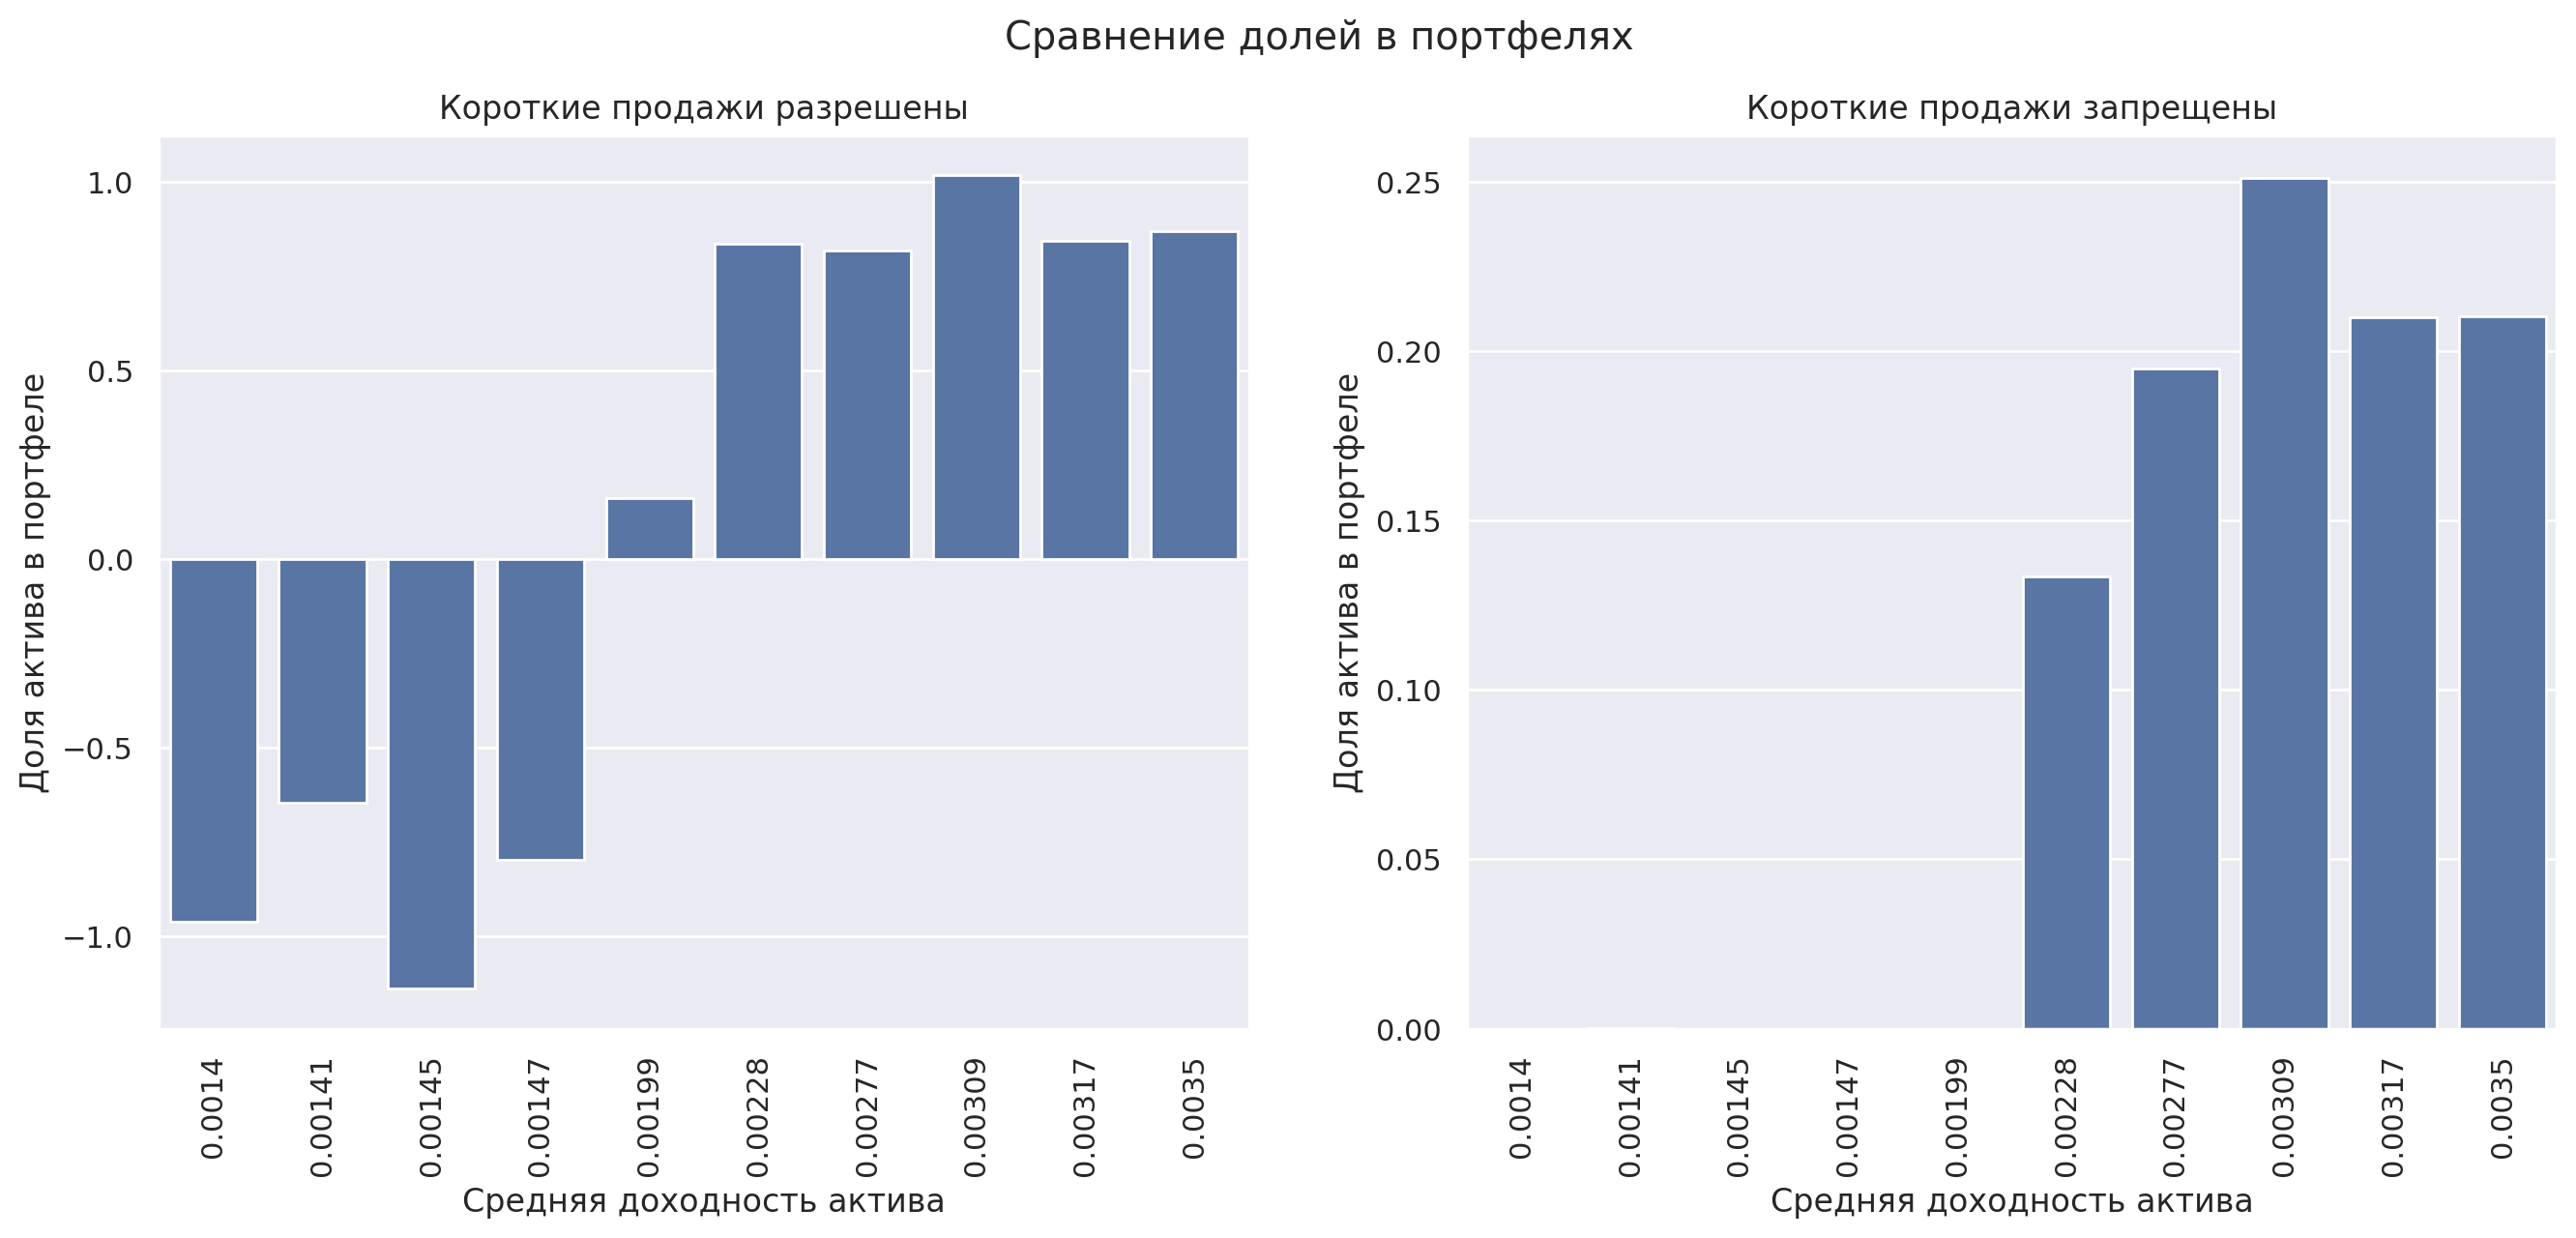

In [27]:
plt.rcParams['figure.figsize'] = 16, 6

plt.suptitle('Сравнение долей в портфелях')

plt.subplot(1,2,1)
plt.title('Короткие продажи разрешены')
sns.barplot(x_with_short_sales)
plt.xticks(rotation=90)
plt.xlabel('Средняя доходность актива')
plt.ylabel('Доля актива в портфеле')

plt.subplot(1,2,2)
plt.title('Короткие продажи запрещены')
sns.barplot(x_without_short_sales)
plt.xticks(rotation=90)
plt.xlabel('Средняя доходность актива')
plt.ylabel('Доля актива в портфеле')

plt.show()

plt.rcParams['figure.figsize'] = 8, 6

Имеют место следующие наблюдения:
- **При запрете коротких продаж:** Модель предпочитает активы с высокими средними доходностями
- **С короткими продажами:** Модель предпочитает большие коэффициенты для активов с высокими средниями доходностями. При этом большие коэффициенты высокодоходных активов компенсируются отрицательными коэффициентами для активов с низкими средними доходностями.

Сравним VaR портфелей.

In [31]:
R_with_short_sales = np.dot(np.array(top10_returns), x_with_short_sales)
R_without_short_sales = np.dot(np.array(top10_returns), x_without_short_sales)

print(f'Короткие продажи разрешены:\n E(x) = {np.round(np.mean(R_with_short_sales),4)} \n std(x) = {np.round(np.std(R_with_short_sales),4)}')
print(f' VaR(-R) на уровне 0.9 = {np.round(np.quantile(-R_with_short_sales, 0.9),4)}')
print(f' VaR(-R) на уровне 0.95 = {np.round(np.quantile(-R_with_short_sales, 0.95),4)}')

print()

print(f'Короткие продажи запрещены:\n E(x) = {np.round(np.mean(R_without_short_sales),4)} \n std(x) = {np.round(np.std(R_without_short_sales),4)}')
print(f' VaR(-R) на уровне 0.9 = {np.round(np.quantile(-R_without_short_sales, 0.9),4)}')
print(f' VaR(-R) на уровне 0.95 = {np.round(np.quantile(-R_without_short_sales, 0.95),4)}')

Короткие продажи разрешены:
 E(x) = 0.0083 
 std(x) = 0.0653
 VaR(-R) на уровне 0.9 = 0.0675
 VaR(-R) на уровне 0.95 = 0.0908

Короткие продажи запрещены:
 E(x) = 0.003 
 std(x) = 0.0149
 VaR(-R) на уровне 0.9 = 0.0144
 VaR(-R) на уровне 0.95 = 0.02


Видно, что:
- больше доходность у портфеля с короткими продажами
- при этом по std и VaR лучше портфель с запретом коротких продаж

# 5. One factor model

Пусть $R_i$ - случайные величины, соответствующие доходности $i$-го актива, $i=1,\ldots,N$.

Однофакторная модель:
$R_i = \alpha_i + \beta_i R_M + \varepsilon_i$, 

где $E(\varepsilon_i)=0$, $\; Cov(R_M,\varepsilon_i)=0$, $\; Cov(\varepsilon_i, \varepsilon_j)=0$.

В качестве $R_M$ положим портфель с равными долями.

In [32]:
from sklearn.linear_model import LinearRegression

models = []
residuals = []

for i in top10_returns.columns:
    lr = LinearRegression()
    lr.fit(np.array(top10_returns[i]).reshape(-1, 1), indexes_returns)
    models.append(lr)
    residuals.append(indexes_returns - lr.predict(np.array(top10_returns[i]).reshape(-1, 1)))

In [33]:
indexes_returns = np.array(top10_returns.mean(axis=1))

С помощью t-теста Стьюдента проверим адекватность предположения $E(\varepsilon_i)=0$. Каждая гипотеза проверяется на уровне значимости $\alpha=0.05$.

In [34]:
from scipy.stats import ttest_1samp

s=0
for i in range(len(top10_returns.columns)):
    t = ttest_1samp(residuals[i],0)
    if t.pvalue < 0.05:
        s+=1
        print(f'Актив {top10_returns.columns[i]}, p_value = {np.round(t.pvalue, 3)}, гипотеза отвергается')
    else:
        print(f'Актив {top10_returns.columns[i]}, p_value = {np.round(t.pvalue, 3)}, гипотеза не отвергается')
print(f'Доля отвергнутых гипотез: {s/len(top10_returns.columns)}')

Актив WD1.SG, p_value = 1.0, гипотеза не отвергается
Актив EFC1.DU, p_value = 1.0, гипотеза не отвергается
Актив C7N.SG, p_value = 1.0, гипотеза не отвергается
Актив MCX.SG, p_value = 1.0, гипотеза не отвергается
Актив A41.BE, p_value = 1.0, гипотеза не отвергается
Актив HOO.SG, p_value = 1.0, гипотеза не отвергается
Актив DPM.DU, p_value = 1.0, гипотеза не отвергается
Актив MCX.DU, p_value = 1.0, гипотеза не отвергается
Актив EFC1.SG, p_value = 1.0, гипотеза не отвергается
Актив 3E2.BE, p_value = 1.0, гипотеза не отвергается
Доля отвергнутых гипотез: 0.0


С помощью теста корреляции Пирсона проверим адекватность предположения $Cov(R_M, \varepsilon_i)=0$.

In [35]:
from scipy.stats import pearsonr

s=0
for i in range(len(top10_returns.columns)):
    pear = pearsonr(residuals[i], indexes_returns)
    if pear.pvalue < 0.05:
        s+=1
        print(f'Актив {top10_returns.columns[i]} и индекс, pearson_corr = {np.round(pear.statistic, 3)}, p_value = {np.round(pear.pvalue, 3)}, гипотеза отвергается')
    else:
        print(f'Актив {top10_returns.columns[i]} и индекс, pearson_corr = {np.round(pear.statistic, 3)}, p_value = {np.round(pear.pvalue, 3)}, гипотеза не отвергается')
print(f'Доля отвергнутых гипотез: {s/len(top10_returns.columns)}')

Актив WD1.SG и индекс, pearson_corr = 0.264, p_value = 0.0, гипотеза отвергается
Актив EFC1.DU и индекс, pearson_corr = 0.291, p_value = 0.0, гипотеза отвергается
Актив C7N.SG и индекс, pearson_corr = 0.283, p_value = 0.0, гипотеза отвергается
Актив MCX.SG и индекс, pearson_corr = 0.308, p_value = 0.0, гипотеза отвергается
Актив A41.BE и индекс, pearson_corr = 0.282, p_value = 0.0, гипотеза отвергается
Актив HOO.SG и индекс, pearson_corr = 0.271, p_value = 0.0, гипотеза отвергается
Актив DPM.DU и индекс, pearson_corr = 0.302, p_value = 0.0, гипотеза отвергается
Актив MCX.DU и индекс, pearson_corr = 0.25, p_value = 0.0, гипотеза отвергается
Актив EFC1.SG и индекс, pearson_corr = 0.299, p_value = 0.0, гипотеза отвергается
Актив 3E2.BE и индекс, pearson_corr = 0.281, p_value = 0.0, гипотеза отвергается
Доля отвергнутых гипотез: 1.0


С помощью теста корреляции Пирсона проверим адекватность предположения $Cov(\varepsilon_i, \varepsilon_j)=0$.

In [41]:
s=0
for i in range(len(top10_returns.columns)):
    for j in range(i+1, len(top10_returns.columns)):
        pear = pearsonr(residuals[i], residuals[j])
        if pear.pvalue < 0.05:
            s+=1
            print(f'Активы {top10_returns.columns[i]} и {top10_returns.columns[j]}, pearson_corr = {np.round(pear.statistic, 3)}, p_value = {np.round(pear.pvalue, 3)}, гипотеза отвергается')
        else:
            print(f'Активы {top10_returns.columns[i]} и {top10_returns.columns[j]}, индекс, pearson_corr = {np.round(pear.statistic, 3)}, p_value = {np.round(pear.pvalue, 3)}, гипотеза не отвергается')
print(f'Доля отвергнутых гипотез: {s/(len(top10_returns.columns)*(len(top10_returns.columns)-1)/2)}')

Активы WD1.SG и EFC1.DU, pearson_corr = 0.947, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и C7N.SG, pearson_corr = 0.97, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и MCX.SG, pearson_corr = 0.976, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и A41.BE, pearson_corr = 0.968, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и HOO.SG, pearson_corr = 0.962, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и DPM.DU, pearson_corr = 0.973, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и MCX.DU, pearson_corr = 0.958, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и EFC1.SG, pearson_corr = 0.957, p_value = 0.0, гипотеза отвергается
Активы WD1.SG и 3E2.BE, pearson_corr = 0.963, p_value = 0.0, гипотеза отвергается
Активы EFC1.DU и C7N.SG, pearson_corr = 0.967, p_value = 0.0, гипотеза отвергается
Активы EFC1.DU и MCX.SG, pearson_corr = 0.974, p_value = 0.0, гипотеза отвергается
Активы EFC1.DU и A41.BE, pearson_corr = 0.966, p_value = 0.0, гипотеза отвергается
Активы EFC1.

Видно, что в данном случае предположения $Cov(R_M,\varepsilon_i)=0$, $\; Cov(\varepsilon_i, \varepsilon_j)=0$ - не выполнены.

Предположим, что предположения однофакторной модели верны.

С помощью аналитической формулы найдем оптимальный портфель:
$$x_i=\dfrac{y_i}{\sum_{i=1}^N y_i}$$
$$y_i = \dfrac{\beta_i}{\delta_i^2} \left( \dfrac{E_i-E_F}{\beta_i} - A \right)$$
где
$$ A = \dfrac{\sigma_M^2 \sum_{i=1}^N \beta_i(E_i - E_F)/\delta_i^2}{1+\sigma_M^2 \sum_{i=1}^N \beta_i^2 / \delta_i^2} $$

Положим $E_F=0.0017$.

In [42]:
beta = np.array([models[i].coef_[0] for i in range(len(models))])
delta = np.array([np.std(residuals[i]) for i in range(len(residuals))])
E_F = 0.0017
sigma_M = np.std(indexes_returns)
E = np.array(top10_returns.mean())

def calculate_A(beta, delta, E, E_F, sigma_M):
    numerator = np.power(sigma_M, 2) * np.sum(beta * (E-E_F) / np.power(delta, 2))
    denumerator = 1 + np.power(sigma_M, 2) * np.sum(np.power(beta, 2) / np.power(delta, 2))
    A = numerator / denumerator
    y = beta / np.power(delta, 2) * ((E - E_F) / beta - A)
    return y / np.sum(y)

x_one_factor = calculate_A(beta, delta, E, E_F, sigma_M)

In [43]:
def draw_efficient_frontier(S: np.ndarray, E: np.ndarray, n: int, E1: float=0.0085):
    x_min_with_short_sales = minimal_risk_with_short_sales(S, E)
    E0_min_with_short_sales = np.dot(x_min_with_short_sales, E)

    E_with_short_sales = np.linspace(E0_min_with_short_sales, E1, 100)
    sigma_with_short_sales = [calcuate_sigma(S, with_short_sales(S, E, i)) for i in E_with_short_sales]
    plt.plot(sigma_with_short_sales, E_with_short_sales, label=f'Эфф.фронт без запрета коротких продаж ({n} акций)')

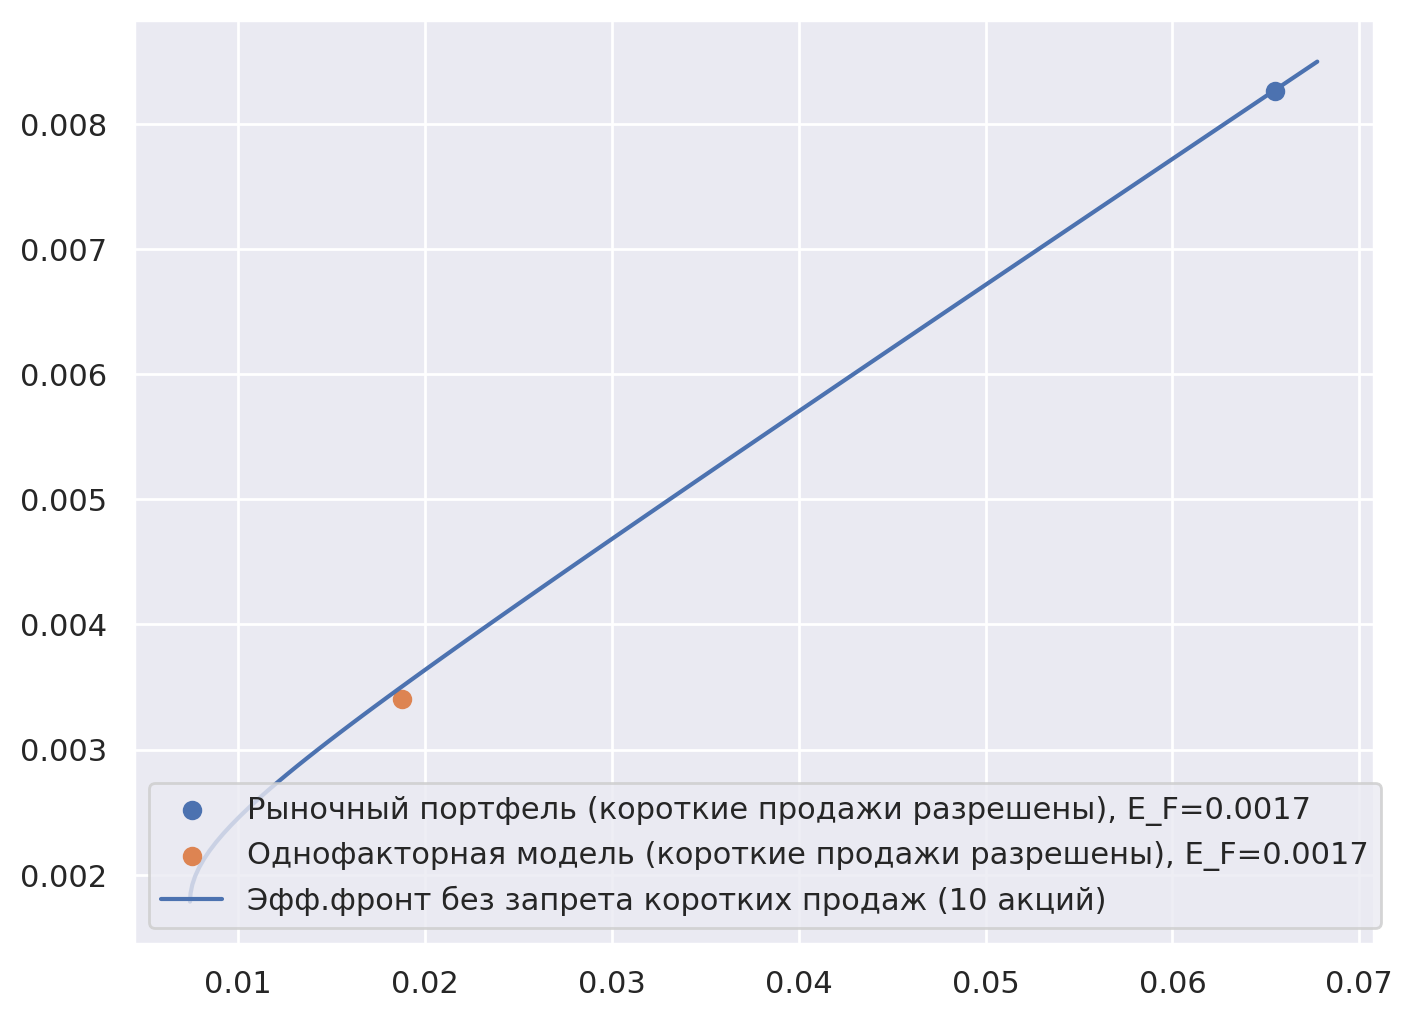

In [44]:
E = np.array(top10_returns.mean())
S = np.array(top10_returns.cov())

plt.scatter([calcuate_sigma(S, x_with_short_sales)], np.dot(E, x_with_short_sales), label='Рыночный портфель (короткие продажи разрешены), E_F=0.0017')
plt.scatter([calcuate_sigma(S, x_one_factor)], np.dot(E, x_one_factor), label='Однофакторная модель (короткие продажи разрешены), E_F=0.0017')

draw_efficient_frontier(S, E, 10)
plt.legend()
plt.show()

Видно, что рыночный портфель однофакторной модели находится далеко от истинного рыночного портфеля при $E_F=0.0017$. Однако, рыночный портфель однофакторной модели лежит практически рядом с эффективным фронтом.

# 6. One factor model. Arbitrage.

Для однофакторной модели из предыдущего пункта составим матрицу:
$$
\begin{pmatrix}
    E_1 & 1 & \beta_1 \\
    E_2 & 1 & \beta_2 \\
    \vdots & \vdots & \vdots \\
    E_N & 1 & \beta_N
\end{pmatrix}
$$

In [48]:
matrix = np.array([E,[1 for i in range(len(E))], beta]).T

In [49]:
matrix

array([[0.00198983, 1.        , 0.14018544],
       [0.00140337, 1.        , 0.18611578],
       [0.00308537, 1.        , 0.05097349],
       [0.00146561, 1.        , 0.05889473],
       [0.00276984, 1.        , 0.05446902],
       [0.00228209, 1.        , 0.09581089],
       [0.00317481, 1.        , 0.03045982],
       [0.00145427, 1.        , 0.14391428],
       [0.00141297, 1.        , 0.1447346 ],
       [0.00350382, 1.        , 0.03750231]])

Разложим данную матрицу с помощью SVD разложения.

In [51]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
svd.fit(matrix)

TruncatedSVD(n_components=3)

В SVD разложении данной матрицы получаются следующие сингулярные числа:

In [54]:
svd.singular_values_[0]

3.1763549204885733

In [55]:
svd.singular_values_[1]

0.16529481258375273

In [56]:
svd.singular_values_[2]

0.0014702253074835628

Собственное число 0.00147 близко к 0, значит ранг данной матрицы близок к 2. А значит арбитражные возможности отсутствуют.